In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Starting Dataframe

In [172]:
df = pd.read_csv('full_data_final.csv')

Check humidity data to make sure it's within reasonable boundaries

max humidity: 100.0
min humidity: 7.1


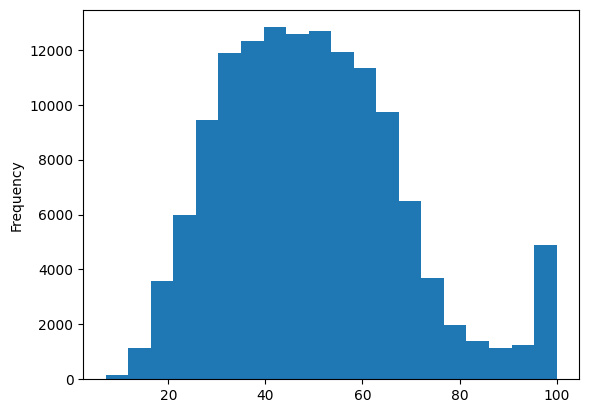

In [173]:
# histogram of humidity
df['humidity'].plot.hist(bins=20)

# max and min humidity
print('max humidity:', df['humidity'].max())
print('min humidity:', df['humidity'].min())

Look at temperature data

max temperature: 297.767
min temperature: -236.0


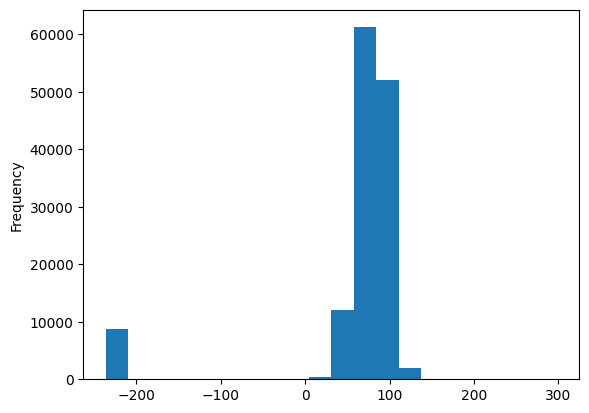

In [174]:
# histogram of temperature
df['temperature'].plot.hist(bins=20)

# max and min temperature
print('max temperature:', df['temperature'].max())
print('min temperature:', df['temperature'].min())

Removing temperature reading errors

In [175]:
# change time to date time format and get months
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df['year_month'] = df['time_stamp'].dt.to_period('M')

# get dataframe with temperature values between 0 and 115
df_tmp = df[(df['temperature'] > 0) & (df['temperature'] < 115)]
df_tmp


/var/folders/6l/_5f2v6_x5hj1cd_lrwrm8k9r0000gn/T/ipykernel_66023/3090017628.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['time_stamp'].dt.to_period('M')


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,sensor_index,latitude,longitude,altitude,Oak,Elm,Pecan,Crape Myrtle,Ashe Juniper,other,total_diameter,canopy_coverage_percentage,PRCP,year_month
0,2024-10-24 18:00:00+00:00,35.447,92.044,981.676,2.5,3.2195,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351,0.00,2024-10
1,2024-10-24 06:00:00+00:00,61.950,78.405,984.603,3.6,5.6470,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351,0.00,2024-10
2,2024-10-24 00:00:00+00:00,45.133,83.672,985.485,3.1,4.7600,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351,0.00,2024-10
3,2024-10-23 00:00:00+00:00,48.216,83.123,986.001,2.6,3.9515,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351,0.00,2024-10
4,2024-10-23 18:00:00+00:00,33.578,93.095,985.318,2.5,3.2565,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351,0.00,2024-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139796,2024-09-25 12:00:00+00:00,44.011,92.011,986.891,3.8,5.5630,236401,30.337454,-97.71158,712.0,495,212,84,102,5,568,14684.0,28.417031,0.42,2024-09
139797,2024-09-25 18:00:00+00:00,34.067,93.089,986.799,5.9,9.3490,236401,30.337454,-97.71158,712.0,495,212,84,102,5,568,14684.0,28.417031,0.42,2024-09
139798,2024-09-27 12:00:00+00:00,31.866,85.650,986.964,3.1,4.5460,236401,30.337454,-97.71158,712.0,495,212,84,102,5,568,14684.0,28.417031,0.00,2024-09
139799,2024-09-27 00:00:00+00:00,28.272,86.028,986.032,3.0,4.4700,236401,30.337454,-97.71158,712.0,495,212,84,102,5,568,14684.0,28.417031,0.00,2024-09


<Axes: ylabel='Frequency'>

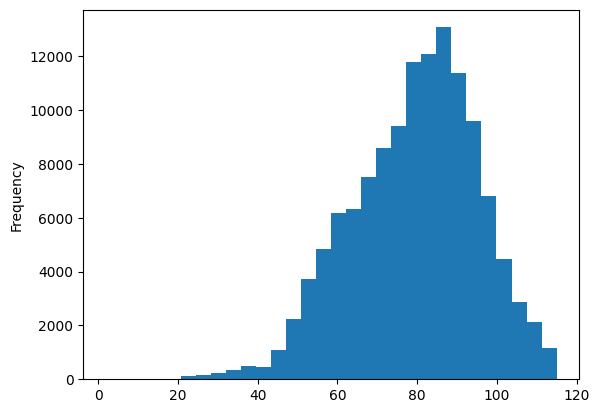

In [176]:
# temperature histogram
df_tmp['temperature'].plot.hist(bins=30)

Clustering by location and month to get the summary of areas across time (will be used to remove outliers later)

/var/folders/6l/_5f2v6_x5hj1cd_lrwrm8k9r0000gn/T/ipykernel_66023/3095393465.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['cluster'] = db.labels_


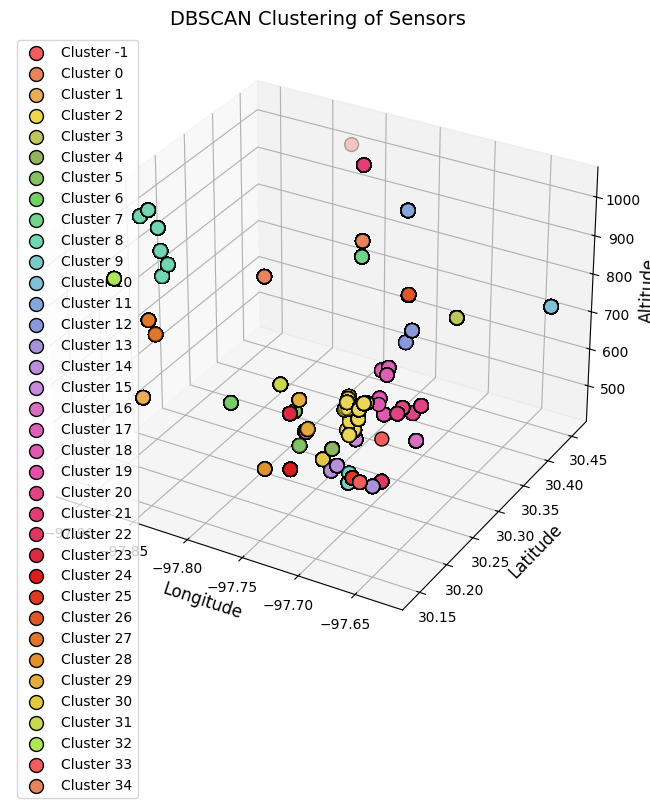

In [177]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# DBSCAN on latitude and longitude
coords = df_tmp[['latitude', 'longitude']].to_numpy()
db = DBSCAN(eps=0.01, min_samples=3).fit(coords)
df_tmp['cluster'] = db.labels_

# Predefined color palette
color_palette = [
    "#F15D5D", "#E8835B", "#EBAD57", "#EDD653", "#BFC55A", "#91B461", "#81C362",
    "#71D162", "#72D48A", "#72D6B1", "#78CCC5", "#7EC2D9", "#85A6DA", "#8998DB",
    "#AA91DB", "#BA8EDB", "#CA8ADB", "#D66EC1", "#DC60B4", "#DF59AE", "#E151A7",
    "#E04485", "#E03E74", "#DF3762", "#DE2A3F", "#DD1C1C", "#DE3A22", "#DF5727",
    "#E0752C", "#E09231", "#E2AD3B", "#E3C844", "#C9D74D", "#AEE655"
]

# Map clusters to colors
unique_clusters = sorted(df_tmp['cluster'].unique())
colors = {cluster: color_palette[i % len(color_palette)] for i, cluster in enumerate(unique_clusters)}

# 3D Plot for Clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in unique_clusters:
    cluster_data = df_tmp[df_tmp['cluster'] == cluster_label]
    # Cluster points (use the predefined color for the cluster)
    ax.scatter(cluster_data['longitude'], cluster_data['latitude'], cluster_data['altitude'],
                c=colors[cluster_label], label=f'Cluster {cluster_label}', edgecolor='k', s=100)

# Add titles and labels
ax.set_title('DBSCAN Clustering of Sensors', fontsize=14)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.set_zlabel('Altitude', fontsize=12)
ax.legend()
plt.show()

In [178]:
# get mean and standard deviation of temperature for each cluster each month
tmp_summary = df_tmp.groupby(['year_month', 'cluster'])['temperature'].agg(['mean', 'std'])
tmp_summary = tmp_summary.reset_index()


tmp_summary

,year_month,cluster,mean,std
0,2022-09,-1,81.937500,NaN
1,2022-09,0,88.996462,6.059856
2,2022-09,1,88.373760,7.027325
3,2022-09,2,90.916076,7.636179
4,2022-09,3,89.920170,6.618990
...,...,...,...,...
569,2024-10,27,86.560778,8.809468
570,2024-10,30,84.147677,8.136907
571,2024-10,32,89.972927,7.849622
572,2024-10,33,97.201319,7.996641


Remove data outside of 2 standard deviations of the mean temperature for a cluster within that given month

In [179]:
# Merge df_tmp with tmp_summary on 'year_month' and 'cluster'
df_merged = df_tmp.merge(tmp_summary, on=['year_month', 'cluster'], how='inner')

# Calculate the range for valid temperatures
lower_bound = df_merged['mean'] - 2 * df_merged['std']
upper_bound = df_merged['mean'] + 2 * df_merged['std']

# Filter df_merged to keep rows where temperature is within 2 std of the mean
df_filtered = df_merged[
    (df_merged['temperature'] >= lower_bound) & 
    (df_merged['temperature'] <= upper_bound)
]

# Optional: Drop the extra columns (mean and std) if not needed
df_filtered = df_filtered.drop(columns=['mean', 'std'])

df_filtered

,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,sensor_index,latitude,longitude,altitude,...,Elm,Pecan,Crape Myrtle,Ashe Juniper,other,total_diameter,canopy_coverage_percentage,PRCP,year_month,cluster
0,2024-10-24 18:00:00+00:00,35.447,92.044,981.676,2.5,3.2195,2862,30.366156,-97.76529,899.0,...,426,2,49,10,130,22595.5,66.596351,0.00,2024-10,0
1,2024-10-24 06:00:00+00:00,61.950,78.405,984.603,3.6,5.6470,2862,30.366156,-97.76529,899.0,...,426,2,49,10,130,22595.5,66.596351,0.00,2024-10,0
2,2024-10-24 00:00:00+00:00,45.133,83.672,985.485,3.1,4.7600,2862,30.366156,-97.76529,899.0,...,426,2,49,10,130,22595.5,66.596351,0.00,2024-10,0
3,2024-10-23 00:00:00+00:00,48.216,83.123,986.001,2.6,3.9515,2862,30.366156,-97.76529,899.0,...,426,2,49,10,130,22595.5,66.596351,0.00,2024-10,0
4,2024-10-23 18:00:00+00:00,33.578,93.095,985.318,2.5,3.2565,2862,30.366156,-97.76529,899.0,...,426,2,49,10,130,22595.5,66.596351,0.00,2024-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127126,2024-09-25 12:00:00+00:00,44.011,92.011,986.891,3.8,5.5630,236401,30.337454,-97.71158,712.0,...,212,84,102,5,568,14684.0,28.417031,0.42,2024-09,12
127127,2024-09-25 18:00:00+00:00,34.067,93.089,986.799,5.9,9.3490,236401,30.337454,-97.71158,712.0,...,212,84,102,5,568,14684.0,28.417031,0.42,2024-09,12
127128,2024-09-27 12:00:00+00:00,31.866,85.650,986.964,3.1,4.5460,236401,30.337454,-97.71158,712.0,...,212,84,102,5,568,14684.0,28.417031,0.00,2024-09,12
127129,2024-09-27 00:00:00+00:00,28.272,86.028,986.032,3.0,4.4700,236401,30.337454,-97.71158,712.0,...,212,84,102,5,568,14684.0,28.417031,0.00,2024-09,12


count    121625.000000
mean         79.482209
std          14.881093
min          26.890000
25%          69.128000
50%          80.966000
75%          90.283000
max         114.862000
Name: temperature, dtype: float64

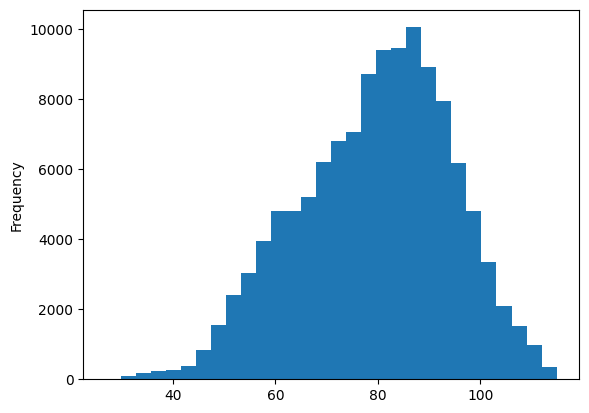

In [180]:
# temperature histogram
df_filtered['temperature'].plot.hist(bins=30)
df_filtered['temperature'].describe()

Adding Seasons to the data

In [181]:
# Ensure 'time_stamp' column is datetime type
df_filtered['time_stamp'] = pd.to_datetime(df_filtered['time_stamp'])

# Define a function to assign seasons based on specific start dates
def get_accurate_season(date):
    if pd.isna(date):
        return np.nan  # Return NaN if date is missing (NaT)
    
    month = date.month
    day = date.day
    
    if (month == 12 and day >= 21) or month in [1, 2] or (month == 3 and day < 20):
        return 'Winter'
    elif (month == 3 and day >= 20) or month in [4, 5] or (month == 6 and day < 21):
        return 'Spring'
    elif (month == 6 and day >= 21) or month in [7, 8] or (month == 9 and day < 22):
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new 'season' column
df_filtered['season'] = df_filtered['time_stamp'].apply(get_accurate_season)

# Display the first few rows
df_filtered[['time_stamp', 'season']].head()

,time_stamp,season
0,2024-10-24 18:00:00+00:00,Fall
1,2024-10-24 06:00:00+00:00,Fall
2,2024-10-24 00:00:00+00:00,Fall
3,2024-10-23 00:00:00+00:00,Fall
4,2024-10-23 18:00:00+00:00,Fall


In [182]:
before_drop = df.shape[0]
df_filtered = df_filtered.dropna(subset=['season'])
after_drop = df_filtered.shape[0]
print(f'Lost {(before_drop-after_drop)/before_drop*100:0.2f}% of data by removing NA')

# One-hot encode the 'season' column
df_filtered = pd.get_dummies(df_filtered, columns=['season'], prefix='season')

# Display the first few rows
df_filtered.head()

Lost 13.00% of data by removing NA


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,sensor_index,latitude,longitude,altitude,...,other,total_diameter,canopy_coverage_percentage,PRCP,year_month,cluster,season_Fall,season_Spring,season_Summer,season_Winter
0,2024-10-24 18:00:00+00:00,35.447,92.044,981.676,2.5,3.2195,2862,30.366156,-97.76529,899.0,...,130,22595.5,66.596351,0.0,2024-10,0,True,False,False,False
1,2024-10-24 06:00:00+00:00,61.950,78.405,984.603,3.6,5.6470,2862,30.366156,-97.76529,899.0,...,130,22595.5,66.596351,0.0,2024-10,0,True,False,False,False
2,2024-10-24 00:00:00+00:00,45.133,83.672,985.485,3.1,4.7600,2862,30.366156,-97.76529,899.0,...,130,22595.5,66.596351,0.0,2024-10,0,True,False,False,False
3,2024-10-23 00:00:00+00:00,48.216,83.123,986.001,2.6,3.9515,2862,30.366156,-97.76529,899.0,...,130,22595.5,66.596351,0.0,2024-10,0,True,False,False,False
4,2024-10-23 18:00:00+00:00,33.578,93.095,985.318,2.5,3.2565,2862,30.366156,-97.76529,899.0,...,130,22595.5,66.596351,0.0,2024-10,0,True,False,False,False


In [ ]:
# write out to csv
df_filtered.to_csv('cleaned_data.csv', index=False)